<a href="https://colab.research.google.com/github/hanishtangella/CNN-and-ANN-on-cifar10-datatset/blob/main/ANN_and_CNN_on_cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train), (X_test,y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train[0]

array([6], dtype=uint8)

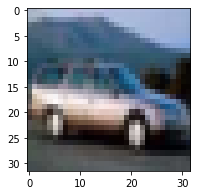

In [ ]:
plt.figure(figsize=(3,3))
for i in range(0,5):
  plt.imshow(X_train[i])

In [ ]:
y_train.shape

(50000, 1)

Scaling X_train and X_test

In [ ]:
X_train = X_train/255
X_test = X_test/255

Building ann

In [ ]:
ann = keras.models.Sequential()
ann.add(keras.layers.Flatten(input_shape = (32,32,3)))
ann.add(keras.layers.Dense(units =32*32,activation='relu'))
ann.add(keras.layers.Dense(units =16*16,activation='relu'))
ann.add(keras.layers.Dense(units = 10, activation='sigmoid'))


In [ ]:
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, epochs = 4)

Epoch 1/4
1563/1563 [==============================] - 40s 26ms/step - loss: 1.5600 - accuracy: 0.4440
Epoch 2/4
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5120 - accuracy: 0.4588
Epoch 3/4
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4781 - accuracy: 0.4716
Epoch 4/4
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4447 - accuracy: 0.4835


In [ ]:
cnn = keras.models.Sequential()

In [ ]:
cnn.add(keras.layers.Conv2D(filters = 32,activation='relu',kernel_size=(3,3), input_shape=(32,32,3)))

In [ ]:
cnn.add(keras.layers.MaxPooling2D((2,2)))

In [ ]:
cnn.add(keras.layers.Conv2D(filters = 32,activation='relu',kernel_size=(3,3)))
cnn.add(keras.layers.MaxPooling2D((2,2)))

In [ ]:
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(units = 64,activation='relu'))
cnn.add(keras.layers.Dense(units = 10, activation='softmax'))

In [ ]:
cnn.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.5081 - accuracy: 0.4610
Epoch 2/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.1803 - accuracy: 0.5840
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0616 - accuracy: 0.6259
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9861 - accuracy: 0.6555
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9271 - accuracy: 0.6758
Epoch 6/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8828 - accuracy: 0.6937
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8417 - accuracy: 0.7074
Epoch 8/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8073 - accuracy: 0.7192
Epoch 9/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7774 - accuracy: 0.7300
Epoch 10/10
1563/1563 [==============================] - 57s 36m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9215 - accuracy: 0.6862


[0.921459972858429, 0.6862000226974487]

In [ ]:
yp = cnn.predict(X_test)

In [ ]:
yp

array([[2.2552691e-04, 7.6000654e-04, 2.1035888e-03, ..., 4.4659882e-05,
        2.5374040e-02, 2.3448872e-04],
       [1.0241959e-03, 2.0885179e-03, 1.7731021e-06, ..., 5.8483274e-10,
        9.9687850e-01, 6.3689113e-06],
       [1.3368161e-02, 5.4226629e-02, 1.6607880e-04, ..., 4.3389449e-05,
        9.2768663e-01, 1.5186269e-03],
       ...,
       [5.8294568e-06, 2.8074664e-06, 9.9358028e-03, ..., 8.0610402e-03,
        6.8755353e-06, 3.8149967e-05],
       [2.9538009e-02, 9.2729047e-02, 9.4394255e-03, ..., 2.1179317e-02,
        7.7070930e-05, 7.6169024e-05],
       [7.7951814e-09, 8.7622723e-08, 1.1277681e-06, ..., 9.9964106e-01,
        1.3085028e-09, 1.5564490e-08]], dtype=float32)

In [ ]:
y_pred = [np.argmax(i) for i in yp]
y_pred

In [ ]:
y_test.reshape(-1,)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6862